In [74]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
pd.options.display.max_rows = 150
pd.options.display.max_columns = 150

In [75]:
df = pd.read_csv("data/data_merge.csv")

In [76]:
num_columns = [col for col in df.columns if df[col].dtype != "object"]
cat_columns = [col for col in df.columns if df[col].dtype == "object"]

In [77]:
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import  StandardScaler,OneHotEncoder,FunctionTransformer
from sklearn.decomposition import PCA,TruncatedSVD
from sklearn.pipeline import Pipeline
from sklearn.manifold import TSNE

std = StandardScaler()
ohe= OneHotEncoder(handle_unknown="ignore",sparse=False)

log_1p = FunctionTransformer(func=np.log1p)
preprocessor_pca = ColumnTransformer(
    transformers=[
        ("ohe",ohe,cat_columns),
        ("log",log_1p,num_columns)
    ]
    
)
pca=Pipeline([
     ('preprocessor', preprocessor_pca),
     ('std', std ),
     ("pca", PCA(n_components=0.99))
])

pca_value = pca.fit_transform(df)

/home/apprenant/miniconda3/envs/client/lib/python3.10/site-packages/sklearn/preprocessing/_encoders.py:828: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


In [78]:

distortions = []
K = range(1,10,1)
for k in K:
    print(k)
    kmeans = KMeans(n_clusters=k,n_init=10,random_state=42,verbose=2)
    kmeans.fit(pca_value)
    distortions.append(kmeans.inertia_)

1
Initialization complete
Iteration 0, inertia 7742086.352944487.
Iteration 1, inertia 2707352.9999993076.
Converged at iteration 1: strict convergence.
Initialization complete
Iteration 0, inertia 4186103.305029705.
Iteration 1, inertia 2707352.999999307.
Converged at iteration 1: strict convergence.
Initialization complete
Iteration 0, inertia 4958273.993164245.
Iteration 1, inertia 2707352.9999993076.
Converged at iteration 1: strict convergence.
Initialization complete
Iteration 0, inertia 11931767.906277623.
Iteration 1, inertia 2707352.9999993076.
Converged at iteration 1: strict convergence.
Initialization complete
Iteration 0, inertia 3723654.144016502.
Iteration 1, inertia 2707352.999999307.
Converged at iteration 1: strict convergence.
Initialization complete
Iteration 0, inertia 3759122.9049118985.
Iteration 1, inertia 2707352.999999307.
Converged at iteration 1: strict convergence.
Initialization complete
Iteration 0, inertia 8378412.893285468.
Iteration 1, inertia 2707352.

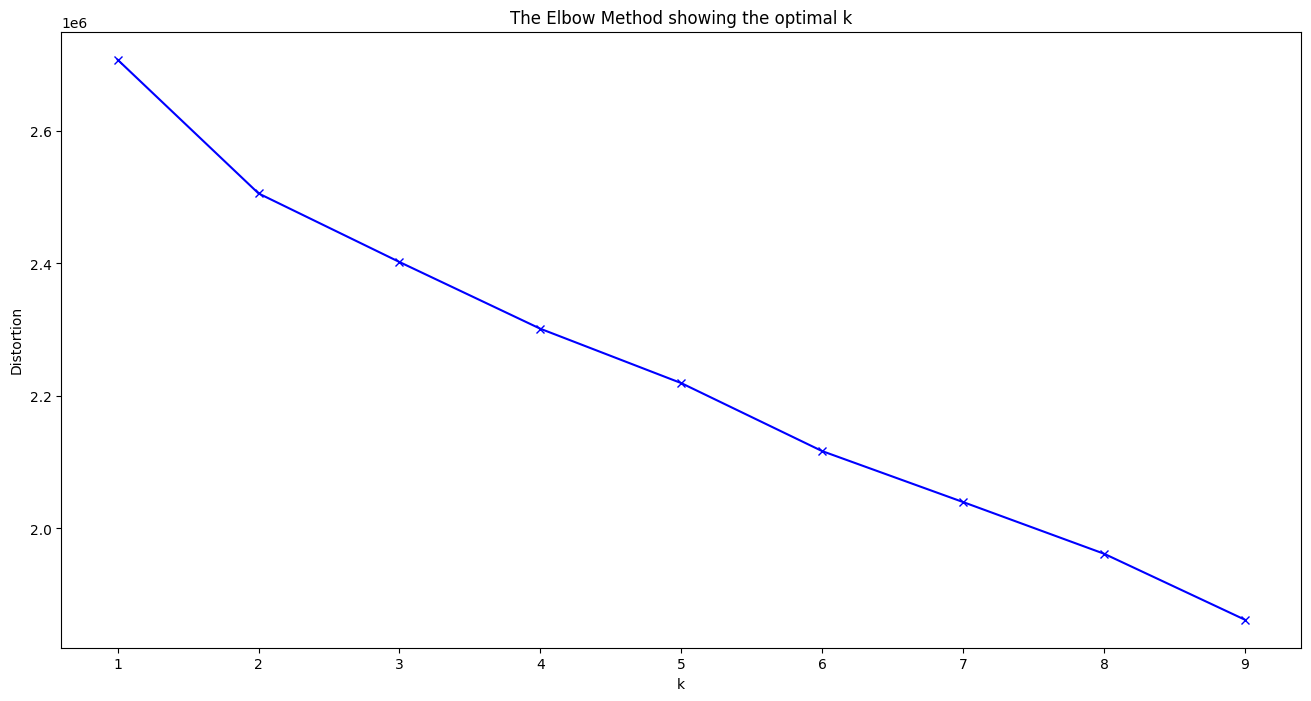

In [79]:
plt.figure(figsize=(16,8))
plt.plot(K, distortions, 'bx-')
plt.xlabel('k')
plt.ylabel('Distortion')
plt.title('The Elbow Method showing the optimal k')
plt.show()

In [86]:
kmeans = KMeans(n_clusters=6,init="random",n_init=10,random_state=42,verbose=2)
kmeans.fit(pca_value)

Initialization complete
Iteration 0, inertia 2783837.5888823178.
Iteration 1, inertia 2239760.7720191367.
Iteration 2, inertia 2200794.7948439154.
Iteration 3, inertia 2184832.5976220043.
Iteration 4, inertia 2176872.796000703.
Iteration 5, inertia 2176799.874122945.
Iteration 6, inertia 2176798.1313408636.
Converged at iteration 6: center shift 2.5480571982758344e-05 within tolerance 0.00010740740740737967.
Initialization complete
Iteration 0, inertia 3064425.0636614454.
Iteration 1, inertia 2250963.370888417.
Iteration 2, inertia 2230190.080386432.
Iteration 3, inertia 2228899.366249726.
Iteration 4, inertia 2228791.701443842.
Iteration 5, inertia 2228751.1881324053.
Iteration 6, inertia 2228725.182747863.
Iteration 7, inertia 2228704.5969576356.
Iteration 8, inertia 2228673.910967929.
Iteration 9, inertia 2228601.376771534.
Iteration 10, inertia 2228411.270694536.
Iteration 11, inertia 2227717.710323158.
Iteration 12, inertia 2226567.6652265103.
Iteration 13, inertia 2226539.3403009

KMeans(init='random', n_clusters=6, n_init=10, random_state=42, verbose=2)

In [87]:
df["label"]=kmeans.labels_

In [88]:
df

,nb_items_total,montant_total,nb_commande,payment_type_most_frequent,most_frequent_product_category,mean_review_score,mean_payment_installments,mean_length_comment_title,mean_length_comment_message,recence,med_product_photos_qty,med_product_description_lenght,label
0,1.0,141.90,1,credit_card,Furniture,5.0,8.0,15.0,111.0,165.0,1.0,236.0,0
1,1.0,27.19,1,credit_card,Health_and_Beauty,4.0,1.0,0.0,0.0,168.0,1.0,635.0,2
2,1.0,86.22,1,credit_card,Miscellaneous,3.0,8.0,0.0,0.0,591.0,3.0,177.0,0
3,1.0,43.62,1,credit_card,Communication,4.0,4.0,0.0,12.0,375.0,5.0,1741.0,2
4,1.0,196.89,1,credit_card,Communication,5.0,6.0,0.0,0.0,342.0,3.0,794.0,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...
93352,2.0,2067.42,1,credit_card,Health_and_Beauty,5.0,10.0,0.0,0.0,501.0,1.0,423.0,2
93353,1.0,84.58,1,credit_card,Baby,4.0,1.0,0.0,0.0,316.0,2.0,506.0,2
93354,1.0,112.46,1,credit_card,Automotive,5.0,1.0,0.0,0.0,622.0,5.0,716.0,2
93355,1.0,133.69,1,credit_card,Well-being,5.0,5.0,8.0,133.0,173.0,3.0,591.0,4


In [89]:
for i in range(0,5):
    print("################\n")
    print(df[df["label"]==i].describe(),"\n")
    print(df[df["label"]==i]["most_frequent_product_category"].value_counts())
    print("################\n")


################

       nb_items_total  montant_total  nb_commande  mean_review_score  \
count    15425.000000   15425.000000      15425.0       15425.000000   
mean         1.208298     148.985816          1.0           4.011151   
std          0.598978     146.510425          0.0           1.390125   
min          1.000000      10.070000          1.0           0.000000   
25%          1.000000      73.150000          1.0           4.000000   
50%          1.000000     113.590000          1.0           5.000000   
75%          1.000000     175.400000          1.0           5.000000   
max          7.000000    4042.740000          1.0           5.000000   

       mean_payment_installments  mean_length_comment_title  \
count               15425.000000               15425.000000   
mean                    3.795008                   1.199611   
std                     2.904468                   4.101589   
min                     1.000000                   0.000000   
25%               

{0: '#1f77b4', 1: '#ff7f0e', 2: '#2ca02c', 3: '#d62728', 4: '#9467bd', 5: '#8c564b'}


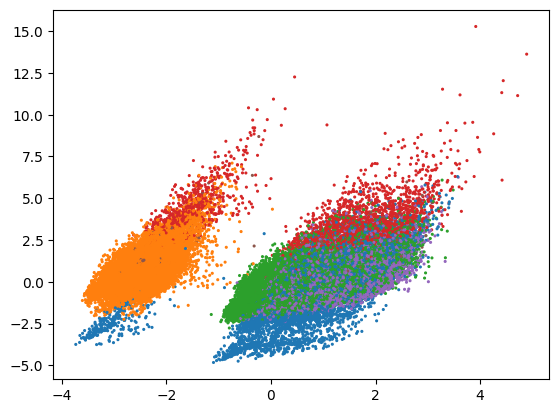

In [93]:
import matplotlib.colors as mcolors

# Créer une liste de couleurs à partir de la palette "Set1" de Matplotlib
set1_colors = list(mcolors.TABLEAU_COLORS.values())[:6]

# Créer un dictionnaire pour mapper des couleurs aux valeurs de la liste
color_dict = {i: set1_colors[i] for i in range(len(set1_colors))}
print(color_dict)
plt.scatter(pca_value[:,0],pca_value[:,1],marker=".",s=6,c=[color_dict[i] for i in df["label"]])
plt.show()

In [91]:
test

NameError: name 'test' is not defined

In [ ]:
from kmodes.kprototypes import KPrototypes
catColumnsPos = [df.columns.get_loc(col) for col in list(df.select_dtypes('object').columns)]

model_Kproto = KPrototypes(n_clusters=4, init="Cao", verbose=2, n_jobs=-1, n_init=8, random_state=42)
df_std = df
df_std[num_columns] = preprocessor.fit_transform(df[num_columns])
model_Kproto.fit_predict(df_std, categorical = catColumnsPos)

In [ ]:
centroides = pca.transform(pd.DataFrame(model_Kproto.cluster_centroids_,columns=df[num_columns+cat_columns].columns))
plt.scatter(pca_value[:,0],pca_value[:,1],c=model_Kproto.labels_,marker=".",s=10)
for center in centroides:
    plt.scatter(center[0],center[1],marker='x',c='r',s=20)